In [2]:
import pandas as pd

In [3]:
#Reading the tweets dataset which is stored in comma-separated values (csv) format. 
#And seeing some initial values of the dataset
text = pd.read_csv("../Assignment 1/tweets-dataset.csv")
text.head()

,Sentence
0,"@BubblyDentist @MeetUunngLee nahi nahi, mere s..."
1,going to the grammys first entertainment law b...
2,bohot hi badiya ji aap sunao?
3,Parvez Musharraf is Digvijay Singh of Pakistan...
4,guddu ko bass john cena k sticker ki padii hai...


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JYOTI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
#Calculating the number of sentences in dataset
lengthSen = len(text["Sentence"])
print("Number of sentences: ",lengthSen) 

Number of sentences:  24521


In [6]:
tokens = []

#Breaking all the sentences of the dataset into tokens and appending it to a list named 'tokens'
#Each sentence froms a list of tokens of it's own. And this list gets appended to 'tokens'
#So 'tokens' is 2D list. It has rows = number of sentences in dataset. Each row contains a list of token of that sentence.
for i in range(lengthSen):
    tokens.append(nltk.word_tokenize(text["Sentence"][i]))

print(type(tokens), '\nNumber of Tokens list:', len(tokens))

totalTokens = 0

#Total number of tokens is equal to summation of all tokens from each sentence
for j in range(lengthSen):
    totalTokens += len(tokens[j])
    
print("Total number of Tokens: ", totalTokens)

<class 'list'> 
Number of Tokens list: 24521
Total number of Tokens:  396826


In [7]:
#Lets see first 5 values to token
tokens[:5]

[['@',
  'BubblyDentist',
  '@',
  'MeetUunngLee',
  'nahi',
  'nahi',
  ',',
  'mere',
  'saath',
  'jaakar',
  'pachtaogi',
  '.',
  'Ye',
  'Uunnglee',
  'is',
  'the',
  'best',
  '.',
  'All',
  'girls',
  'say',
  'that'],
 ['going',
  'to',
  'the',
  'grammys',
  'first',
  'entertainment',
  'law',
  'breakfast',
  'here',
  'in',
  'nyc',
  'tomorrow',
  '!',
  'i',
  "'m",
  'so',
  'excited',
  '.',
  'one',
  'step',
  'closer',
  '.',
  '.',
  '.'],
 ['bohot', 'hi', 'badiya', 'ji', 'aap', 'sunao', '?'],
 ['Parvez',
  'Musharraf',
  'is',
  'Digvijay',
  'Singh',
  'of',
  'Pakistanhttps',
  ':',
  '//twitter.com/IndiaToday/status/599994321610285058',
  '…'],
 ['guddu',
  'ko',
  'bass',
  'john',
  'cena',
  'k',
  'sticker',
  'ki',
  'padii',
  'hai',
  ':',
  'd',
  ':',
  'd']]

In [8]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_token=[]

#stemming is done to reduce the word to it's root form
#Reducing all the tokens to its root form
for i in range(lengthSen):
    for token in tokens[i]:
        stem_token.append(stemmer.stem(token))   

In [9]:
#Lets see root word for first 10 token
stem_token[:10]

['@',
 'bubblydentist',
 '@',
 'meetuunngle',
 'nahi',
 'nahi',
 ',',
 'mere',
 'saath',
 'jaakar']

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

#Lemmatizer groups together different inflected forms of a word
#Using Word Net Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JYOTI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
lemma_token=[]

#grouping all the stem words
for stem in stem_token:
    lemma_token.append(lemmatizer.lemmatize(stem))

In [12]:
#Lets see some stem words
lemma_token[10:20]

['pachtaogi', '.', 'Ye', 'uunngle', 'is', 'the', 'best', '.', 'all', 'girl']

In [13]:
from nltk.probability import FreqDist

#Calculating the frequency distribution of lemmas. This gives us the number of type of words in dataset
frequency = sorted(FreqDist(lemma_token).items(),key=lambda k:k[1], reverse=True)
types = len(frequency)
print("Number of unique words: ", types)

Number of unique words:  39482


In [14]:
#frquency is a list of tuples (<stem word>, <occurrences>)
#Some frequencies
frequency[50:60]

[('aaj', 873),
 ('(', 872),
 ('raha', 849),
 ('thi', 826),
 ('par', 816),
 ('aap', 804),
 ('hain', 804),
 ('kuch', 797),
 ('koi', 796),
 ('ne', 795)]

In [15]:
#TTR is type-token ratio
#TTR is calculated by total number of unique words (type) divided by total number of words in the data (totalTokens)
TTR = types/totalTokens
print("Type-Token Ratio: ", TTR)

Type-Token Ratio:  0.09949448876837708


In [16]:
#Zipf’s Law
'''Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table.'''

"Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table."

In [17]:
word_count = []

#Storing the value of some random frequencies, say in the frequency table from 100 to 150, i.e., 50 frequencie
for i in range(100, 150):
    word_count.append(frequency[i][1])

In [18]:
import matplotlib.pyplot as plt

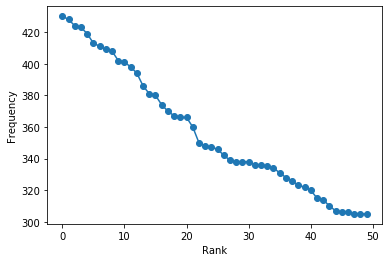

In [19]:
#Ploting the frequencies on linear scale
plt.plot(sorted(word_count, reverse = True), marker = "o")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

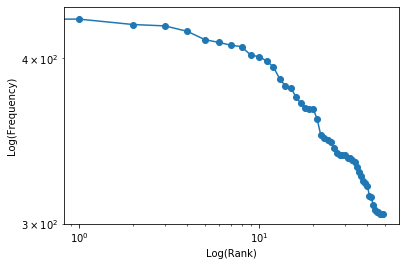

In [20]:
#Ploting the frequencies on logarithmic scale
plt.plot(sorted(word_count, reverse = True), marker = "o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.show()

In [21]:
#Heaps’s Law
'''Heaps' law (also called Herdan's law) is an empirical law which describes the number of distinct words in a document (or set of documents) as a function of the document length (so called type-token relation).'''

"Heaps' law (also called Herdan's law) is an empirical law which describes the number of distinct words in a document (or set of documents) as a function of the document length (so called type-token relation)."

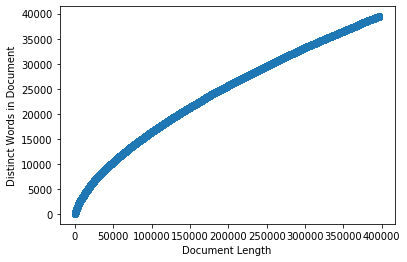

In [22]:
#For whole dataset we count the words that occur and whether they contribute to dictionary of words
x = []
count = 0
rememberWord = []
for l in lemma_token:
    if l not in rememberWord:
        rememberWord.append(l)
        count += 1
    x.append(count)
    
#Ploting the graph for the Heaps law
plt.plot(x, marker = "o")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Document Length")
plt.ylabel("Distinct Words in Document")
plt.show()